In [2]:
'''
plot the digitized histogram of electron recoil plots from the paper

'''


import ROOT as rt
import sys
import numpy as np

sys.path.append('/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph


Welcome to JupyROOT 6.18/02


In [3]:
# load digitized plots from paper

path = '/storage/af/user/christiw/login-1/christiw/DM/SNSPD_GaAs_limit/data/'

ele_recoil = {}
limits = {}

ele_recoil['Fdmq-2_1GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdmq-2_GaAs_1GeV.csv', delimiter = ',')
ele_recoil['Fdmq-2_0p01GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdmq-2_GaAs_0p01GeV.csv', delimiter = ',')
ele_recoil['Fdm1_1GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdm1_GaAs_1GeV.csv', delimiter = ',')
ele_recoil['Fdm1_0p01GeV'] = np.genfromtxt(path + '1607.01009_Fig4_Fdm1_GaAs_0p01GeV.csv', delimiter = ',')


limits['Fdmq-2_1ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_GaAs_1ph.csv', delimiter = ',')
limits['Fdm1_1ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_GaAs_1ph.csv', delimiter = ',')
limits['Fdmq-2_2ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_GaAs_2ph.csv', delimiter = ',')
limits['Fdm1_2ph'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_GaAs_2ph.csv', delimiter = ',')

limits['Fdmq-2_XENON'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdmq-2_XENON10_1kg-year.csv', delimiter = ',')
limits['Fdm1_XENON'] = np.genfromtxt(path + '1607.01009_Fig2_limit_Fdm1_XENON10_1kg-year.csv', delimiter = ',')




Fdmq-2_1GeV 74.92117893356
Fdmq-2_0p01GeV 3864.1814058464242
Fdm1_1GeV 912.1329451418247
Fdm1_0p01GeV 24864.537054331577


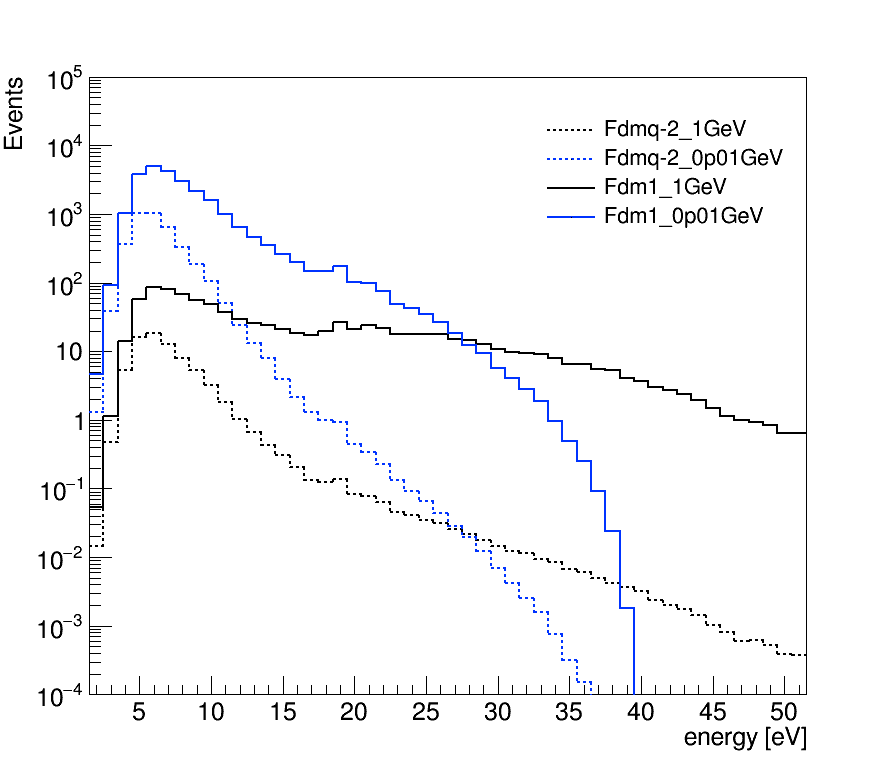

In [4]:
h = {}
rt.gStyle.SetOptStat(0)
leg = rt.TLegend(0.6,0.7,0.9,0.85)
leg.SetBorderSize(0)
c = rt.TCanvas('','',900,800)
ph_num = {}
for i, k in enumerate(ele_recoil.keys()):
    ph_num[k] = np.array(np.arange(1.5,len(ele_recoil[k])+2, 1))
    h[k] = create_TH1D( np.ones(1), axis_title=['energy [eV]', 'Events'], name=k, binning=ph_num[k])
    for j in range(h[k].GetNbinsX()):
        h[k].SetBinContent(j+1, ele_recoil[k][j][1])
    h[k].SetTitle('')
    h[k].SetMaximum(1e5)
    h[k].SetMinimum(1e-4)

    if not '0p01' in k:
        h[k].GetXaxis().SetRangeUser(1.5,51.5)
        h[k].GetXaxis().SetLimits(1.5,51.5)
        h[k].SetLineColor(1)
    else: h[k].SetLineColor(860)
    if 'Fdm1' in k:h[k].SetLineStyle(1)
    else: h[k].SetLineStyle(2)
    h[k].SetLineWidth(2)
    leg.AddEntry(h[k],k)
    h[k].Draw("same hist")
    print(k, h[k].Integral())
leg.Draw()
c.SetLogy()
c.Draw()